In [1]:
import numpy as np
from adaline import adaline
from pandas import DataFrame
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

## Testing adaline for simple liniar sepration

given a value from R^2, (x, y), is y > 1 ?

In [2]:
train_data = np.random.uniform(-100, 100, (1000, 2))
train_label = train_data[:,1] > 1

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,-10.06284,76.177504,True
1,-22.715311,-73.598878,False
2,20.625507,-22.901623,False
3,32.55261,67.968364,True
4,-79.007596,17.580779,True
...,...,...,...
995,53.967621,86.639952,True
996,12.188856,1.582089,True
997,-87.689841,52.12715,True
998,-72.078769,27.704803,True


In [3]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-1.45526723, 35.40226702])

In [4]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.992

In [5]:
test_data =  np.random.uniform(-100, 100, (1000, 2))
test_label = test_data[:,1] > 1

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.988

In [6]:
# preforms just as well on new data, perhaps a tiny bit worse

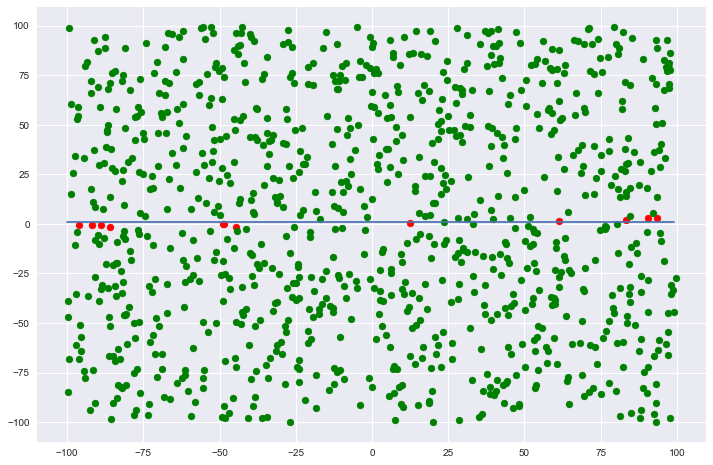

In [7]:
mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

In [8]:
# the angle/slope is a bit off

In [9]:
#does more data help?

train_data = np.random.uniform(-100, 100, (30000, 2)) # 30 times as many dots as before
train_label = train_data[:,1] > 1

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.995

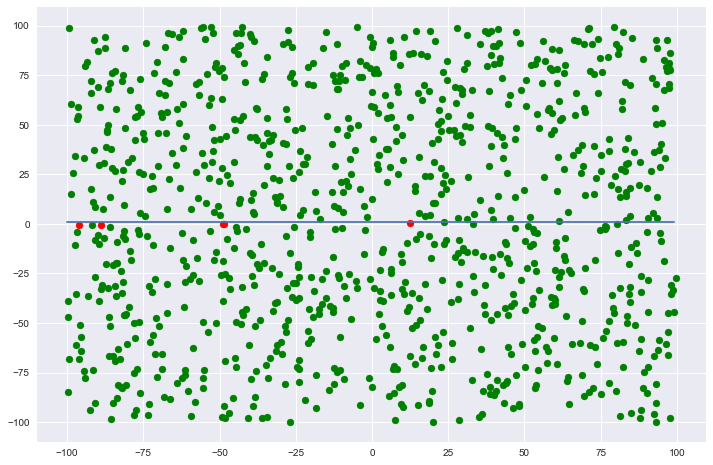

In [10]:
#seems like it

mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.plot(list(range(-100, 100)) , np.ones(200))
plt.show()

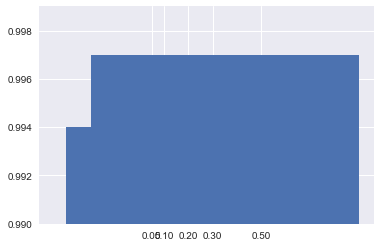

In [11]:
#what about different learning rates

scores = []

rates = [0.05, 0.1, 0.2, 0.3, 0.5]

for rate in rates:

    neuron = adaline(2, rate)

    history = neuron.train(train_data, train_label)

    pred = np.array([neuron.predict(i) for i in test_data])
    pred = pred >= 0.5

    scores.append(metrics.accuracy_score(test_label, pred))


plt.bar(rates, scores)
plt.xticks(rates)
plt.ylim([0.99,0.999])
plt.show()

In [12]:
#looks like somewhere in the middle is more relable

## Testing adaline for a more challenging task

given a value from R^2, (x, y).
does it setesfy: 4 <= x^2 + y^2 <= 9 ?

this equation describe a ring with raduises 2 and 3

In [13]:
# we'll have to decrease the posiable range of values to balance the data-set

train_data = np.random.uniform(-6, 6, (1000, 2))

small_circle = 4 <= train_data[:,0]**2 + train_data[:,1]**2
big_circle = train_data[:,0]**2 + train_data[:,1]**2 <= 9

train_label = small_circle & big_circle

DataFrame([train_data[:,0], train_data[:,1], train_label]).T.rename(columns = {0: 'x', 1:'y', 2: 'target'})

,x,y,target
0,-4.319005,3.330968,False
1,3.736128,-3.791103,False
2,-1.324847,0.736859,False
3,3.853563,2.635013,False
4,-4.38913,5.66577,False
...,...,...,...
995,2.083822,-5.787663,False
996,2.790223,-5.731272,False
997,2.350913,-1.894577,False
998,-1.148241,0.017914,False


In [14]:
neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

neuron.weights

array([-0.10754814,  0.55538643])

In [15]:
pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5
pred

metrics.accuracy_score(train_label, pred)

0.479

In [16]:
# preforms poorly but is to be excpected since
# 1-neuron model can only learn linarly seprable
# classification problomes
# in fact its predictions are in part with simply geussing (around 0.5 correct predictions)


In [17]:
train_data = np.random.uniform(-6, 6, (30000, 2)) # 30 times as many dots as before

circle_small = 4 <= train_data[:,0]**2 + train_data[:,1]**2
circle_big = train_data[:,0]**2 + train_data[:,1]**2 <= 9

train_label = circle_small & circle_big

neuron = adaline(2, 0.3)

history = neuron.train(train_data, train_label)

pred = np.array([neuron.predict(i) for i in train_data])
pred = pred >= 0.5

metrics.accuracy_score(train_label, pred)

0.4984

In [18]:
test_data =  np.random.uniform(-6, 6, (1000, 2))

circle_small = 4 <= test_data[:,0]**2 + test_data[:,1]**2
circle_big = test_data[:,0]**2 + test_data[:,1]**2 <= 9

test_label = circle_small & circle_big

pred = np.array([neuron.predict(i) for i in test_data])
pred = pred >= 0.5

metrics.accuracy_score(test_label, pred)

0.481

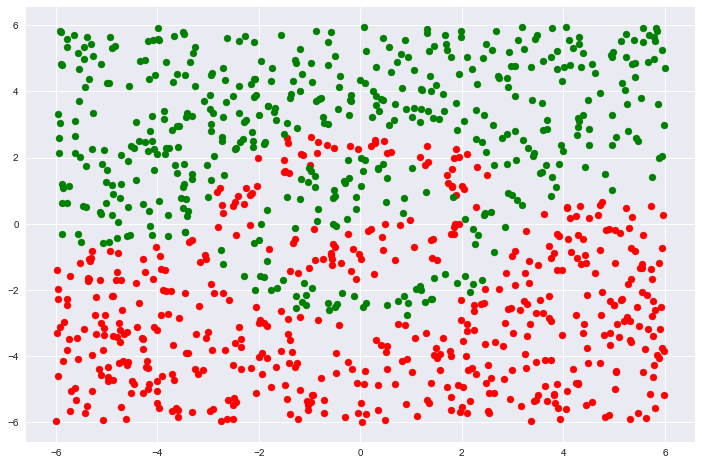

In [19]:
mistakes = test_data[np.where(test_label != pred)]
success = test_data[np.where(test_label == pred)]

plt.figure(figsize = (12, 8))
plt.scatter(mistakes[:, 0], mistakes[:, 1], color = 'r')
plt.scatter(success[:, 0], success[:, 1], color = 'g')
plt.show()

In [20]:
# we can see very clearly that the adaline tried to find a LINIAR inequalty
# to classefy the instances by which

### MultyLevelPreceptron - MLP
we'll now try a more powerfull model for this problome
a very simple form of a NerualNetwork

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
# we'll use 2 hidden layers, out of the thought that there are 2 circles
# the net needs 'to understand'.
# the 2nd layer has 4 neurons because a ring is 4 dimentional
# meaning: it is defined  by 4 pharameters

# we use tanh as the activatin function because its very similar to
# sigmoid wich we are already familiar with in this project 

mlp = MLPClassifier(max_iter = 500, activation = 'tanh', hidden_layer_sizes = (6,4))

mlp.fit(train_data, train_label)

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 4), max_iter=500)

In [23]:
pred = mlp.predict(test_data)

metrics.accuracy_score(test_label, pred)

0.996

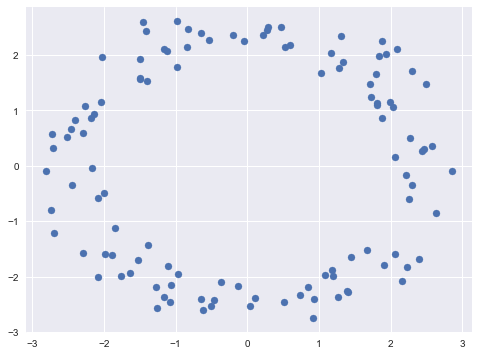

In [24]:
# almost no mistakes, lets view the dots it classefied correctly

success = test_data[np.where(pred == True)]

plt.figure(figsize = (8, 6))
plt.scatter(success[:, 0], success[:, 1])
plt.show()

In [25]:
# looks about right, next we'll attempt to plot the predictions each
# neuron in the net woud make if it would be the final stop
# it's view point of the data so to speak

In [26]:
# so the following code will generate the value each neuron
# holds after a prediction-forwarding

indevidual_predictions = []

for dot in test_data:

    preds = [list(dot)]

    for i, layer in enumerate(mlp.coefs_):

        preds.append([])

        for j in range(len(layer[0])):

            preds[i+1].append(np.tanh(np.array(preds[i]).dot(layer[:,j])))

    indevidual_predictions.append(preds)
    
indevidual_predictions = np.array(indevidual_predictions)
        

C:\Users\Admin\AppData\Local\Temp\ipykernel_13420\1714243270.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  indevidual_predictions = np.array(indevidual_predictions)


In [27]:
layer1 = indevidual_predictions[:,1]
layer1 = indevidual_predictions[:,2]
output_layer = indevidual_predictions[:,3]

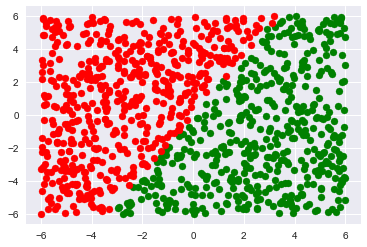

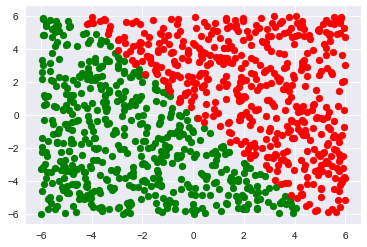

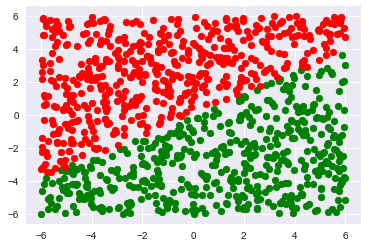

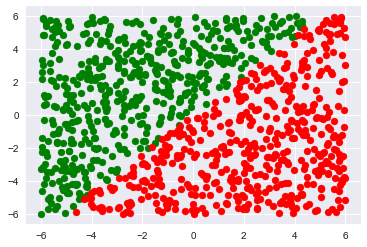

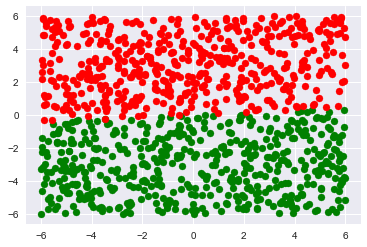

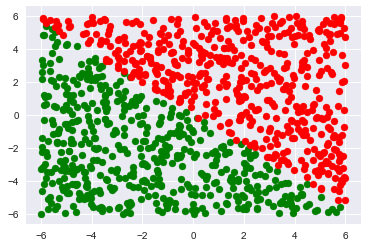

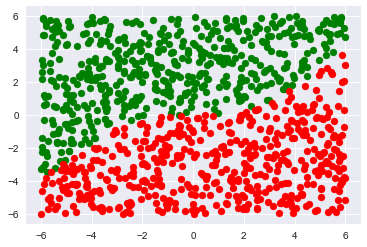

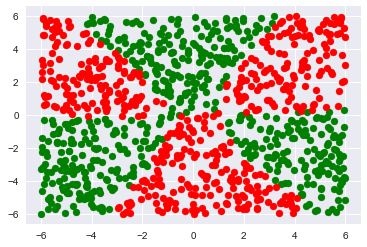

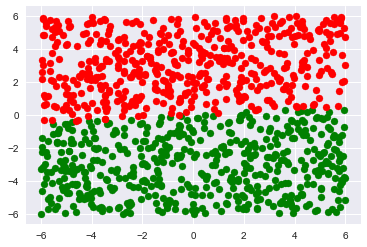

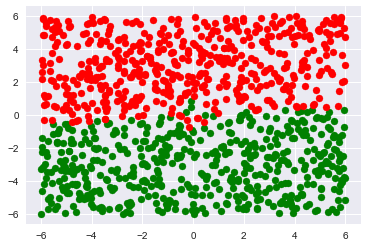

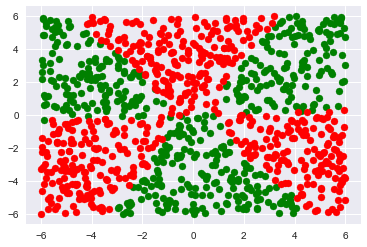

In [36]:
for i in range(1, len(mlp.coefs_) +1):

    layer = indevidual_predictions[:,i]

    for j in range(len(mlp.coefs_[i-1][0])):

        n = np.array([example[j] for example in layer])
        yes = n >= 0
        no =  n < 0

        plt.scatter(test_data[yes][:,0], test_data[yes][:,1], color = 'g')
        plt.scatter(test_data[no][:,0], test_data[no][:,1], color = 'r')
        plt.show()

In [28]:
mlp.coefs_

[array([[ 0.59315066, -0.56355296,  0.01540173, -1.2893029 ,  0.04255593,
         -1.16040182],
        [-0.33150563, -0.43201964, -0.02442591,  1.09429819, -0.58418641,
         -1.25060793]]),
 array([[-1.39016027, -4.08986258,  3.46816631,  2.25854957],
        [-1.17323663, -4.02084856,  3.46222516,  2.24899288],
        [-0.63220167, -3.06105133,  0.57272548,  1.32801619],
        [ 2.75046166, -0.07226576,  0.23251917,  1.65178437],
        [-0.09098375,  4.02585002,  2.90636005,  2.24717067],
        [-2.84262533,  0.09602005, -0.28130688, -1.67538556]]),
 array([[-11.17112963],
        [-15.90614458],
        [ -5.19958268],
        [ -7.48454456]])]

In [39]:
data = test_data
preds = []
for layer_i in range(len(mlp.coefs_)):
    preds.append([])
    node_vectors = mlp.coefs_[layer_i].T
    for j in range(len(node_vectors)):
        preds[layer_i].append(np.tanh(data.dot(node_vectors[j]) + mlp.intercepts_[layer_i][j]))
    data = np.array(preds[layer_i]).T




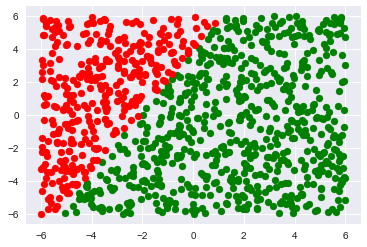

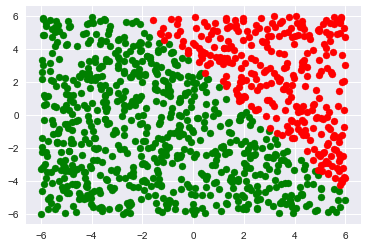

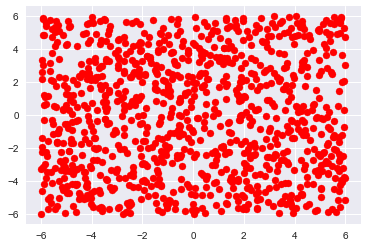

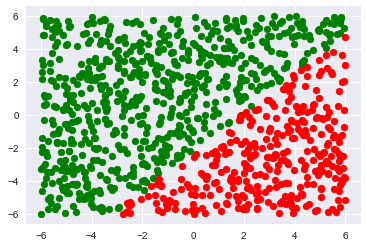

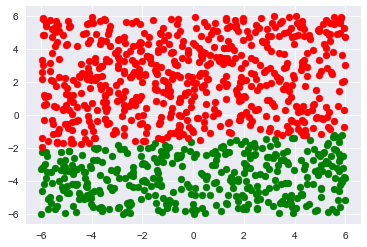

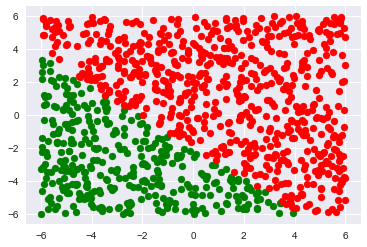

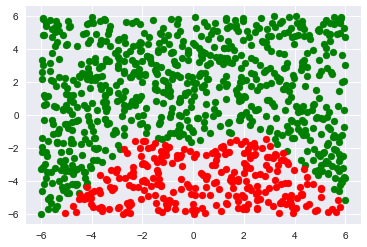

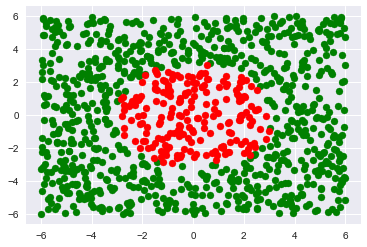

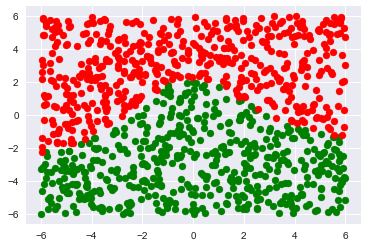

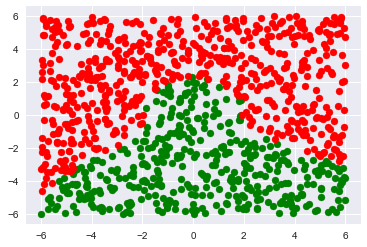

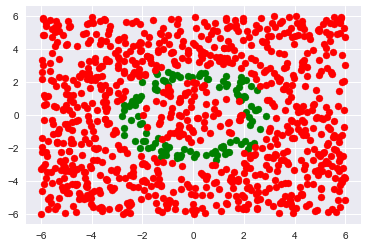

In [40]:
for i in range(len(mlp.coefs_)):
    for node_i in range(len(mlp.coefs_[i].T)):
        n = preds[i][node_i]
        yes = n >= 0
        no =  n < 0
        plt.scatter(test_data[yes][:,0], test_data[yes][:,1], color = 'g')
        plt.scatter(test_data[no][:,0], test_data[no][:,1], color = 'r')
        plt.show()

[array([ 1.2535642 ,  1.31207111, -2.44016364,  2.48400959, -0.93312668,
        -2.55758936]),
 array([ 0.9841787 ,  2.1577162 , -0.11617325, -1.54619267]),
 array([-1.61834681])]